In [52]:
import numpy as np
import _pickle as pickle
import matplotlib.pyplot as plt
from numpy import mean, ceil, where, log2
from numpy.fft import fft, ifft, fftfreq

In [60]:
simulator_args = {
    "dt": 1e-6, "DeltaT": 1/25_000, "TotalT": 13, "transient_time": 3
}

prior_limits = {
    "mu_y": [1e4, 140e4],
    "k_y": [1.5e-2, 30e-2],
    "k_int": [1e-3, 6e-3],
    "tau": [2e-2, 20e-2],
    "eps": [0.5, 6],
}

In [53]:
with open("../Simulations/20240513/20240513-113652_200sims_process67020.pkl", "rb") as f:
    data = pickle.load(f)

In [54]:
theta_trace = data["theta"]
x_trace = data["x_trace"]
y_trace = data["y_trace"]
f_trace = data["f_trace"]
n_sim = data["n_sim"]

In [55]:
selected_sim = 0
theta = theta_trace[:,selected_sim]
x = x_trace[selected_sim]
y = y_trace[selected_sim]
f = f_trace[selected_sim]

In [56]:
# Naive Descriptors

# Mean
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_f = np.mean(f)

print(f"Mean x: {mean_x}, Mean y: {mean_y}, Mean f: {mean_f}")

# Variance
var_x = np.var(x)
var_y = np.var(y)
var_f = np.var(f)
print(f"Variance x: {var_x}, Variance y: {var_y}, Variance f: {var_f}")

# Covariance
cov_xy = np.cov(x, y)[0,1]
cov_xf = np.cov(x, f)[0,1]
cov_yf = np.cov(y, f)[0,1]
print(f"Covariance x-y: {cov_xy}, Covariance x-f: {cov_xf}, Covariance y-f: {cov_yf}")

# Correlation
corr_xy = np.corrcoef(x, y)[0,1]
corr_xf = np.corrcoef(x, f)[0,1]
corr_yf = np.corrcoef(y, f)[0,1]
print(f"Correlation x-y: {corr_xy}, Correlation x-f: {corr_xf}, Correlation y-f: {corr_yf}")

Mean x: -16.133438110351562, Mean y: 5.066000461578369, Mean f: 0.18039999902248383
Variance x: 18159976.0, Variance y: 12124620.0, Variance f: 2.3592305183410645
Covariance x-y: 497367.3846663134, Covariance x-f: 338.57033112857226, Covariance y-f: 26.640747528499567
Correlation x-y: 0.03351844395014681, Correlation x-f: 0.05172545735527172, Correlation y-f: 0.004981101815417649


In [107]:
mu_x = 2.8e4
k_x = 6e-3
kbT = 3.8
mu_y = theta[0]
k_y = theta[1]
k_int = theta[2]
tau = theta[3]
eps = theta[4]
D_x = kbT * mu_x
D_y = kbT * mu_y
dt = 1e-6

# Pre-compute constant
sqrt_2mu_x_D_x_dt = np.sqrt(2*mu_x*D_x*dt)
sqrt_2mu_y_D_y_dt = np.sqrt(2*mu_y*D_y*dt)
sqrt_2eps2_dt_tau = np.sqrt(2*eps**2*dt/tau)

mu_x_dt = mu_x*dt
mu_y_dt = mu_y*dt
tau_dt = dt/tau

In [127]:
print("Deterministic part: ",x[1] +mu_x*(- k_x * x[1] + k_int*y[1])*dt )
print("Stochastic part: ", sqrt_2mu_x_D_x_dt * np.random.randn(1,1))
det = x +mu_x*(- k_x * x + k_int*y)*dt
stoc = sqrt_2mu_x_D_x_dt * np.random.randn(len(x),)

Deterministic part:  [6011.34010804]
Stochastic part:  [[-2.20507351]]


In [146]:
ratio_trace = np.zeros((len(x),1))
for i in range(1,len(x)):
    ratio_trace[i] = mu_x*(- k_x * x[i] + k_int*y[i])*dt / sqrt_2mu_x_D_x_dt * np.random.randn(1,1)

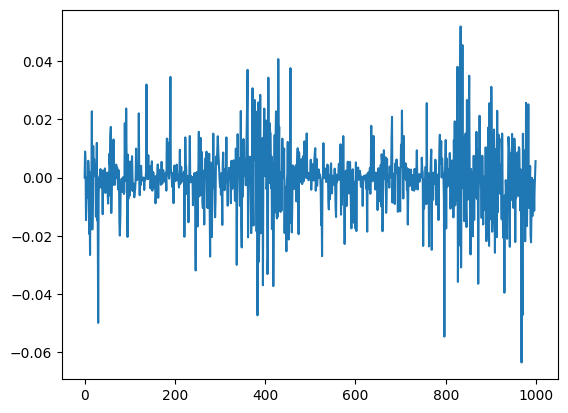

In [147]:
plt.plot(ratio_trace[:1000])

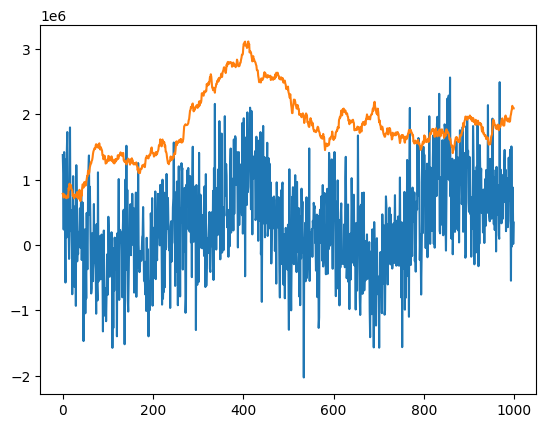

In [150]:
A = mu_x*(- k_x * y + k_int*x)
B = mu_y * f
plt.plot(A[:1000])
plt.plot(B[:1000])